In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [4]:
def lisa_pearson_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    return lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [5]:
def lisa_dtw_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10, distance_function='euclidean'):
    return lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function=distance_function)

In [6]:
def lisa_geo_l(df, df_class, time_series_id, maximize_score='F1-Score'):
    return lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [7]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [8]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [9]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [10]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [11]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Hum1 Single - TS LENGTH
dataset_name = 'Humidity'
ts_name_lisa = 'LUZ'
dimensions = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

In [13]:
# TS LENGTH - LISA PEARSON
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
pearson_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_pearson_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    pearson_results.append(result)
    
lisa_pearson_results = np.array(pearson_results)

In [14]:
# TS LENGTH - LISA DTW
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
dtw_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_dtw_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    dtw_results.append(result)
    
lisa_dtw_results = np.array(dtw_results)

In [15]:
# TS LENGTH - LISA GEO
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
geo_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info = lisa_geo_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    geo_results.append(result)
    
lisa_spatial_results = np.array(geo_results)

In [16]:
# TS LENGTH - RPCA
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
r_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [17]:
# TS LENGTH - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [18]:
# TS LENGTH - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [19]:
# TS LENGTH - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)  

In [20]:
# TS LENGTH - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [21]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [22]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': array([[1.   , 0.   , 1.   ],
       [0.393, 0.021, 0.6  ],
       [0.234, 0.027, 0.429],
       [0.164, 0.043, 0.32 ],
       [0.208, 0.059, 0.431],
       [0.234, 0.049, 0.453],
       [0.25 , 0.043, 0.464],
       [0.26 , 0.033, 0.48 ],
       [0.254, 0.03 , 0.471],
       [0.203, 0.024, 0.4  ],
       [0.256, 0.033, 0.471],
       [0.272, 0.03 , 0.486],
       [0.389, 0.026, 0.622],
       [0.385, 0.029, 0.623],
       [0.381, 0.027, 0.617]])}, {'title': 'LISA (DTW)', 'scores': array([[1.   , 0.   , 1.   ],
       [0.301, 0.031, 0.5  ],
       [0.16 , 0.065, 0.296],
       [0.123, 0.059, 0.258],
       [0.279, 0.053, 0.5  ],
       [0.303, 0.044, 0.519],
       [0.317, 0.039, 0.526],
       [0.322, 0.037, 0.525],
       [0.304, 0.035, 0.508],
       [0.245, 0.045, 0.43 ],
       [0.237, 0.042, 0.439],
       [0.252, 0.039, 0.452],
       [0.357, 0.03 , 0.598],
       [0.361, 0.029, 0.6  ],
       [0.358, 0.027, 0.594]])}, {'title': 'LISA (Vani

In [3]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': np.array([[1.   , 0.   , 1.   ],
       [0.393, 0.021, 0.6  ],
       [0.234, 0.027, 0.429],
       [0.164, 0.043, 0.32 ],
       [0.208, 0.059, 0.431],
       [0.234, 0.049, 0.453],
       [0.25 , 0.043, 0.464],
       [0.26 , 0.033, 0.48 ],
       [0.254, 0.03 , 0.471],
       [0.203, 0.024, 0.4  ],
       [0.256, 0.033, 0.471],
       [0.272, 0.03 , 0.486],
       [0.389, 0.026, 0.622],
       [0.385, 0.029, 0.623],
       [0.381, 0.027, 0.617]])}, {'title': 'LISA (DTW)', 'scores': np.array([[1.   , 0.   , 1.   ],
       [0.301, 0.031, 0.5  ],
       [0.16 , 0.065, 0.296],
       [0.123, 0.059, 0.258],
       [0.279, 0.053, 0.5  ],
       [0.303, 0.044, 0.519],
       [0.317, 0.039, 0.526],
       [0.322, 0.037, 0.525],
       [0.304, 0.035, 0.508],
       [0.245, 0.045, 0.43 ],
       [0.237, 0.042, 0.439],
       [0.252, 0.039, 0.452],
       [0.357, 0.03 , 0.598],
       [0.361, 0.029, 0.6  ],
       [0.358, 0.027, 0.594]])}, {'title': 'LISA (Vanilla)', 'scores': np.array([[1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   ],
       [0.316, 0.043, 0.435],
       [0.214, 0.045, 0.357],
       [0.255, 0.076, 0.441],
       [0.276, 0.063, 0.457],
       [0.279, 0.059, 0.453],
       [0.276, 0.056, 0.444],
       [0.287, 0.051, 0.452],
       [0.266, 0.022, 0.476],
       [0.312, 0.025, 0.533],
       [0.306, 0.024, 0.525],
       [0.449, 0.025, 0.68 ],
       [0.459, 0.023, 0.686],
       [0.454, 0.022, 0.68 ]])}, {'title': 'RPCA', 'scores': np.array([[0.368, 0.04 , 0.5  ],
       [0.319, 0.05 , 0.444],
       [0.147, 0.07 , 0.276],
       [0.109, 0.065, 0.235],
       [0.29 , 0.056, 0.5  ],
       [0.306, 0.048, 0.508],
       [0.26 , 0.057, 0.444],
       [0.19 , 0.08 , 0.347],
       [0.258, 0.036, 0.467],
       [0.271, 0.018, 0.438],
       [0.337, 0.017, 0.513],
       [0.329, 0.017, 0.5  ],
       [0.562, 0.016, 0.741],
       [0.572, 0.015, 0.747],
       [0.563, 0.015, 0.744]])}, {'title': 'Histogram', 'scores': np.array([[0.018, 0.73 , 0.052],
       [0.003, 0.575, 0.05 ],
       [0.018, 0.677, 0.047],
       [0.   , 0.19 , 0.026],
       [0.033, 0.284, 0.145],
       [0.022, 0.345, 0.112],
       [0.013, 0.42 , 0.087],
       [0.01 , 0.415, 0.078],
       [0.008, 0.454, 0.068],
       [0.005, 0.502, 0.06 ],
       [0.006, 0.544, 0.063],
       [0.004, 0.581, 0.057],
       [0.   , 0.575, 0.074],
       [0.   , 0.586, 0.07 ],
       [0.   , 0.583, 0.068]])}, {'title': 'Cluster', 'scores': np.array([[0.434, 0.03 , 0.571],
       [0.174, 0.11 , 0.267],
       [0.099, 0.103, 0.205],
       [0.074, 0.092, 0.178],
       [0.224, 0.078, 0.418],
       [0.223, 0.073, 0.405],
       [0.145, 0.111, 0.291],
       [0.111, 0.14 , 0.233],
       [0.077, 0.096, 0.218],
       [0.151, 0.025, 0.324],
       [0.187, 0.025, 0.372],
       [0.184, 0.023, 0.364],
       [0.44 , 0.022, 0.659],
       [0.451, 0.021, 0.667],
       [0.451, 0.02 , 0.667]])}, {'title': 'SVM', 'scores': np.array([[0.547, 0.01 , 0.667],
       [0.312, 0.015, 0.4  ],
       [0.261, 0.013, 0.333],
       [0.225, 0.012, 0.286],
       [0.158, 0.03 , 0.211],
       [0.151, 0.027, 0.2  ],
       [0.145, 0.024, 0.19 ],
       [0.139, 0.022, 0.182],
       [0.109, 0.023, 0.222],
       [0.028, 0.05 , 0.138],
       [0.05 , 0.047, 0.187],
       [0.05 , 0.044, 0.185],
       [0.198, 0.045, 0.431],
       [0.21 , 0.041, 0.442],
       [0.209, 0.039, 0.438]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.025, 0.61 , 0.062],
       [0.061, 0.16 , 0.158],
       [0.035, 0.24 , 0.1  ],
       [0.012, 0.298, 0.063],
       [0.068, 0.276, 0.179],
       [0.053, 0.315, 0.145],
       [0.037, 0.381, 0.113],
       [0.046, 0.322, 0.122],
       [0.033, 0.344, 0.104],
       [0.032, 0.278, 0.109],
       [0.027, 0.34 , 0.101],
       [0.027, 0.344, 0.096],
       [0.057, 0.338, 0.163],
       [0.048, 0.369, 0.145],
       [0.048, 0.363, 0.142]])}]

In [16]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], marker=".", label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)    
    fig.tight_layout()
    plt.show()

In [17]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], marker=".", label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False) 
    fig.tight_layout()
    plt.show()

In [18]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], marker=".", label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False) 
    fig.tight_layout()
    plt.show()

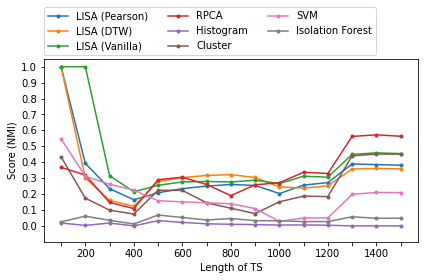

In [19]:
generate_nmi_line_chart(dimensions, scores)

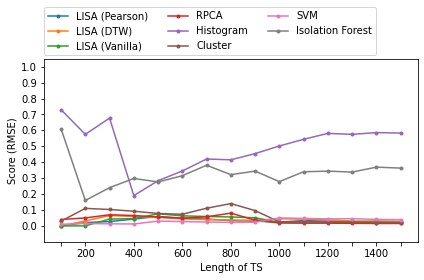

In [20]:
generate_rmse_line_chart(dimensions, scores)

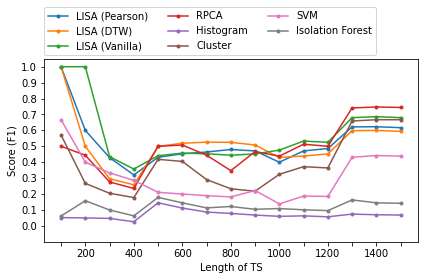

In [21]:
generate_f1_line_chart(dimensions, scores)